In [31]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn-white')
import pandas as pd
from datetime import datetime

In [12]:
# looking at graffiti removal data

In [13]:
graff = pd.read_csv("https://data.cityofchicago.org/resource/cdmx-wzbz.csv")

In [14]:
graff.dtypes

:@computed_region_43wa_7qmu                   int64
:@computed_region_6mkv_f3dw                   int64
:@computed_region_awaf_s7ux                   int64
:@computed_region_bdys_3d7i                   int64
:@computed_region_vrxf_vc4k                   int64
community_area                                int64
completion_date                              object
creation_date                                object
latitude                                    float64
location                                     object
location_address                            float64
location_city                               float64
location_state                              float64
location_zip                                float64
longitude                                   float64
police_district                               int64
service_request_number                       object
ssa                                         float64
status                                       object
street_addre

In [15]:
graff.rename(columns={'what_type_of_surface_is_the_graffiti_on_':'types'}, inplace=True)

In [21]:
#no of requests in each subtype over time
#convert time format
graff['creation_date'] = pd.to_datetime(graff['creation_date'], format= '%Y-%m-%d')
graff['completion_date'] = pd.to_datetime(graff['completion_date'], format= '%Y-%m-%d')

In [23]:
graff.dtypes

:@computed_region_43wa_7qmu                int64
:@computed_region_6mkv_f3dw                int64
:@computed_region_awaf_s7ux                int64
:@computed_region_bdys_3d7i                int64
:@computed_region_vrxf_vc4k                int64
community_area                             int64
completion_date                   datetime64[ns]
creation_date                     datetime64[ns]
latitude                                 float64
location                                  object
location_address                         float64
location_city                            float64
location_state                           float64
location_zip                             float64
longitude                                float64
police_district                            int64
service_request_number                    object
ssa                                      float64
status                                    object
street_address                            object
type_of_service_requ

In [34]:
# no of requests in each subtypes by completion date
pd.crosstab(graff['completion_date'],graff['types'])

types,Aluminum Siding,Asphalt,Brick - Painted,Brick - Unpainted,"Cement (Sidewalk, Alley, Wall, Curb)",Glass,Limestone,Marble/Granite,Metal - Painted,Metal - Unpainted,Other / Unknown Surface,Other/Unknown Surface,Stucco,Vinyl Siding,Wood - Painted,Wood - Unpainted
completion_date,,,,,,,,,,,,,,,,
2018-03-29,0,0,0,6,0,0,0,0,10,1,1,0,0,0,0,0
2018-03-30,1,0,51,66,11,4,0,0,157,1,0,0,0,0,1,0
2018-04-02,7,2,83,111,24,11,1,1,246,37,1,11,1,2,7,6


In [27]:
#add response time column
graff["response_time"] = graff["completion_date"] - graff["creation_date"]

In [29]:
#response time by type of requests
pd.crosstab(graff['response_time'],graff['types'])

types,Aluminum Siding,Asphalt,Brick - Painted,Brick - Unpainted,"Cement (Sidewalk, Alley, Wall, Curb)",Glass,Limestone,Marble/Granite,Metal - Painted,Metal - Unpainted,Other / Unknown Surface,Other/Unknown Surface,Stucco,Vinyl Siding,Wood - Painted,Wood - Unpainted
response_time,,,,,,,,,,,,,,,,
0 days,1,0,107,132,20,9,0,0,361,26,1,0,0,1,1,1
1 days,3,0,8,21,2,1,1,1,12,1,0,1,1,0,1,0
2 days,2,2,7,13,5,1,0,0,11,7,0,3,0,0,2,3
3 days,2,0,11,17,8,4,0,0,29,5,1,7,0,1,4,2
4 days,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0


In [63]:
# no of requests in total by response dates
pd.crosstab(index=graff["response_time"], columns="count")

col_0,count
response_time,
0 days,666
1 days,53
2 days,56
3 days,91
4 days,1


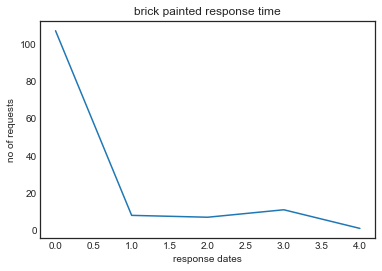

In [47]:
#compare the trend of response dates within same catergory, for example within brick painting
response_time = [0, 1, 2, 3, 4]
brick_painted = [107, 8, 7, 11, 1]
plt.plot(response_time, brick_painted)
plt.title("brick painted response time")
plt.ylabel("no of requests")
plt.xlabel("response dates")
plt.show()

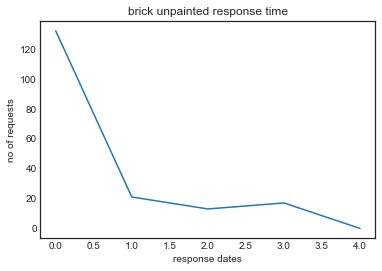

In [46]:
response_time = [0, 1, 2, 3, 4]
brick_unpainted = [132, 21, 13, 17, 0]
plt.plot(response_time, brick_unpainted)
plt.title("brick unpainted response time")
plt.ylabel("no of requests")
plt.xlabel("response dates")
plt.show()

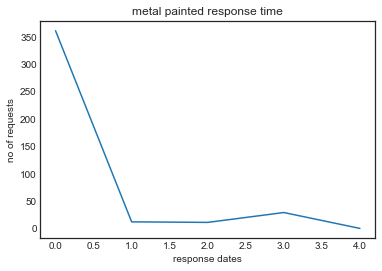

In [48]:
# compare the trend of response dates across categories, for example brick painting and metal painting
response_time = [0, 1, 2, 3, 4]
metal_painted = [361, 12, 11, 29, 0]
plt.plot(response_time, metal_painted)
plt.title("metal painted response time")
plt.ylabel("no of requests")
plt.xlabel("response dates")
plt.show()

In [50]:
# looking at vacant and abandoned buildings data, no of requests in total community area 
pd.crosstab(index=graff["community_area"], columns="count")

col_0,count
community_area,
1,7
2,25
3,14
4,28
5,50
6,12
7,29
8,4
11,2


In [6]:
#no of requests in each subtype by community area
pd.crosstab(graff['community_area'],graff['types'])

types,Aluminum Siding,Asphalt,Brick - Painted,Brick - Unpainted,"Cement (Sidewalk, Alley, Wall, Curb)",Glass,Limestone,Marble/Granite,Metal - Painted,Metal - Unpainted,Other / Unknown Surface,Other/Unknown Surface,Stucco,Vinyl Siding,Wood - Painted,Wood - Unpainted
community_area,,,,,,,,,,,,,,,,
1,0,0,0,0,0,0,0,0,7,0,0,0,0,0,0,0
2,0,0,4,9,0,0,0,0,11,0,0,0,0,0,1,0
3,0,0,1,4,1,1,0,0,6,0,0,0,0,0,0,1
4,0,0,0,3,0,0,0,0,19,4,0,1,0,0,1,0
5,0,0,3,1,0,0,0,0,41,0,0,2,0,1,2,0
6,0,1,1,1,0,1,0,0,6,0,0,1,0,0,1,0
7,0,0,1,1,2,0,0,0,15,4,0,4,0,0,1,1
8,0,0,0,0,0,0,0,0,3,0,1,0,0,0,0,0
11,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0


In [52]:
#looking at the vacant building data
vacant = pd.read_csv("https://data.cityofchicago.org/resource/yama-9had.csv")

In [53]:
vacant.dtypes

:@computed_region_43wa_7qmu                                           float64
:@computed_region_6mkv_f3dw                                             int64
:@computed_region_awaf_s7ux                                           float64
:@computed_region_bdys_3d7i                                           float64
:@computed_region_vrxf_vc4k                                           float64
address_street_direction                                               object
address_street_name                                                    object
address_street_number                                                   int64
address_street_suffix                                                  object
any_people_using_property_homeless_childen_gangs_                      object
community_area                                                          int64
date_service_request_was_received                                      object
if_the_building_is_open_where_is_the_entry_point_               

In [54]:
#rename long variables
vacant.rename(columns={'any_people_using_property_homeless_childen_gangs_':'any_people'}, inplace=True)

In [55]:
vacant.rename(columns={'if_the_building_is_open_where_is_the_entry_point_':'entry'}, inplace=True)

In [56]:
vacant.rename(columns={'is_building_open_or_boarded_':'board'}, inplace=True)

In [57]:
vacant.rename(columns={'is_the_building_currently_vacant_or_occupied_':'currently'}, inplace=True)

In [58]:
vacant.rename(columns={'is_the_building_dangerous_or_hazardous_': 'dangerious'}, inplace=True)

In [59]:
vacant.rename(columns={'is_the_building_vacant_due_to_fire_':'fire'}, inplace=True)

In [61]:
#no of requests in each subtype over time
#convert time format
vacant['date_service_request_was_received'] = pd.to_datetime(vacant['date_service_request_was_received'], format= '%Y-%m-%d')

In [67]:
pd.crosstab(vacant['date_service_request_was_received'],vacant['entry'])

entry,2ND FLOOR,2ND FLOOR ENTRANCE IS NOT BOARDED UP--GANG BANGERS AND DRUG DEALERS HANG AROUND AND HIDE THEIR DRUGS--- BACKYARD IS FULL OF GARBAGE AND THE FRONT,6 WINDOWS OPEN AND MISSING,ALL,ALL AORUND,ALL AROUIND,ALL AROUND,ALL DOOR OPEN AFTER FIRE,ALL DOORS AND WINDOWS,ALL ENTRANCES ARWE OPEN,...,WINDOWS AND BACK DOOR,WINDOWS AND DOORS,WINDOWS AND REAR DOOR,"WINDOWS ARE BROKEN OPEN REAR DOOR IS OPEN, 1ST AND 2ND FLR. WINDOWS BROKEN,","WINDOWS ARE GARAGE IS OPEN REAR DOOR IS OPEN, KNOB OF FRONT DOOR IS GONE,",WINDOWS ARE OPEN,"WINDOWS ARE OPEN, BASEMENT DOOR IS OPEN",WINDOWS BROKEN ON SIDE AND REAR DOOR OPEN AND BUSTED,WINDOWS OPEN ON THE SIDE,WINDOWS WITH BOARDS
date_service_request_was_received,,,,,,,,,,,,,,,,,,,,,
2017-12-05,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2017-12-06,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2017-12-07,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2017-12-08,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2017-12-09,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2017-12-10,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2017-12-11,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2017-12-12,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2017-12-13,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [68]:
pd.crosstab(index=vacant["date_service_request_was_received"], columns="count")

col_0,count
date_service_request_was_received,
2017-12-05,18
2017-12-06,20
2017-12-07,7
2017-12-08,7
2017-12-09,3
2017-12-10,3
2017-12-11,9
2017-12-12,9
2017-12-13,14


In [65]:
# looking at vacant and abandoned buildings data, no of requests in total community area 
pd.crosstab(index=vacant["community_area"], columns="count")

col_0,count
community_area,
1,4
2,3
3,1
4,5
5,3
6,7
7,2
8,3
10,5


In [49]:
# looking at vacant and abandoned buildings data, no of requests in each subtypes community area 
pd.crosstab(vacant['community_area'],vacant['any_people'])

any_people,False,True
community_area,,
1,2,1
2,2,0
3,0,1
4,2,1
5,2,0
6,5,2
7,1,0
8,2,1
10,4,0


In [64]:
pd.crosstab(vacant['community_area'],vacant['entry'])

entry,2ND FLOOR,2ND FLOOR ENTRANCE IS NOT BOARDED UP--GANG BANGERS AND DRUG DEALERS HANG AROUND AND HIDE THEIR DRUGS--- BACKYARD IS FULL OF GARBAGE AND THE FRONT,6 WINDOWS OPEN AND MISSING,ALL,ALL AORUND,ALL AROUIND,ALL AROUND,ALL DOOR OPEN AFTER FIRE,ALL DOORS AND WINDOWS,ALL ENTRANCES ARWE OPEN,...,WINDOWS AND BACK DOOR,WINDOWS AND DOORS,WINDOWS AND REAR DOOR,"WINDOWS ARE BROKEN OPEN REAR DOOR IS OPEN, 1ST AND 2ND FLR. WINDOWS BROKEN,","WINDOWS ARE GARAGE IS OPEN REAR DOOR IS OPEN, KNOB OF FRONT DOOR IS GONE,",WINDOWS ARE OPEN,"WINDOWS ARE OPEN, BASEMENT DOOR IS OPEN",WINDOWS BROKEN ON SIDE AND REAR DOOR OPEN AND BUSTED,WINDOWS OPEN ON THE SIDE,WINDOWS WITH BOARDS
community_area,,,,,,,,,,,,,,,,,,,,,
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
11,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
14,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [51]:
pd.crosstab(vacant['community_area'],vacant['board'])

board,Boarded,Open
community_area,,
1,1,2
2,0,2
3,0,1
4,0,3
5,0,2
6,3,4
7,1,0
8,1,2
10,1,3


In [52]:
pd.crosstab(vacant['community_area'],vacant['currently'])

currently,Occupied,Vacant
community_area,,
1,0,3
2,0,2
3,0,1
4,0,3
5,0,2
6,0,7
7,0,1
8,0,3
10,0,4


In [53]:
pd.crosstab(vacant['community_area'],vacant['dangerious'])

""


In [54]:
pd.crosstab(vacant['community_area'],vacant['fire'])

fire,False,True
community_area,,
1,3,0
2,2,0
3,1,0
4,3,0
5,2,0
6,7,0
7,1,0
8,3,0
10,3,1


In [ ]:
# looking at alley lights out data

In [70]:
alley = pd.read_csv("https://data.cityofchicago.org/resource/j9pw-ad5p.csv")

In [71]:
alley.dtypes

:@computed_region_43wa_7qmu    float64
:@computed_region_6mkv_f3dw      int64
:@computed_region_awaf_s7ux    float64
:@computed_region_bdys_3d7i    float64
:@computed_region_vrxf_vc4k    float64
community_area                   int64
completion_date                 object
creation_date                   object
latitude                       float64
location                        object
location_address               float64
location_city                  float64
location_state                 float64
location_zip                   float64
longitude                      float64
police_district                  int64
service_request_number          object
status                          object
street_address                  object
type_of_service_request         object
ward                             int64
x_coordinate                   float64
y_coordinate                   float64
zip_code                       float64
dtype: object

In [72]:
# looking at alley lights out data, no of requests in each subtype over time

In [73]:
# no of requests in total by community area 
pd.crosstab(index=alley["community_area"], columns="count")

col_0,count
community_area,
1,7
2,22
3,5
4,7
5,6
6,6
7,12
8,2
9,7


In [74]:
#no of requests over time
#convert time format
alley['creation_date'] = pd.to_datetime(alley['creation_date'], format= '%Y-%m-%d')
alley['completion_date'] = pd.to_datetime(alley['completion_date'], format= '%Y-%m-%d')

In [76]:
#add response time column
alley["response_time"] = alley["completion_date"] - alley["creation_date"]

In [77]:
#response time trend
pd.crosstab(alley['response_time'],alley['type_of_service_request'])

type_of_service_request,Alley Light Out
response_time,
0 days,172
1 days,41
2 days,18
3 days,21
4 days,19
5 days,19
6 days,9
7 days,5
8 days,4
